In [33]:
import pickle
from sklearn.decomposition import KernelPCA
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Image
init_notebook_mode(connected=True)
import wwl_model
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width  = 600
png_renderer.height = 500

In [34]:
with open("pre_computed_wwlgpr.pickle", "rb") as infile:
    pre_computed_kernel = pickle.load(infile)
with open("./../database/puremetal_filenames.pickle", "rb") as infile:
    filenames = pickle.load(infile)
with open("./../database/puremetal_ads_energies.pickle", "rb") as infile:
    ads_energies = pickle.load(infile)   

In [35]:
def plt_kpca(kernel_matrix, y=None, name_list=None):
    kpca = KernelPCA(kernel='precomputed', n_components=2)
    x_kpca = kpca.fit_transform(kernel_matrix)
    colors  = y
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x_kpca[:,0], y=x_kpca[:,1], mode='markers',hovertext=name_list,
                             marker=dict(
                                 size=10,
                                 #color = "black",
                                 color =colors,
                                 colorscale="Viridis",
                                 colorbar=dict(title="ads_energy")
                                        )
                             
                             ))
    fig.update_layout(     
                            font = dict(
                                        family='Times New Roman',color='black', size=22),
                  
                            plot_bgcolor = 'white',
                            xaxis = dict(
                                        title='PC1',
                                        showline=True,
                                        showgrid=False,
                                        gridcolor="white",
                                        showticklabels=False,
                                        linecolor='black',
                                        linewidth=2,
                                        ticks='outside',
                                        mirror=True,),

                            yaxis = dict(
                                        #title='<b>Bold</b> <i>animals</i>',
                                        title='PC2',
                                        showline=True,
                                        showgrid=False,
                                        gridcolor="white",
                                        showticklabels=False,
                                        linecolor='black',
                                        linewidth=2,
                                        ticks='outside',
                                        mirror=True,)
                         )
    fig.show("png")
    #fig.show()

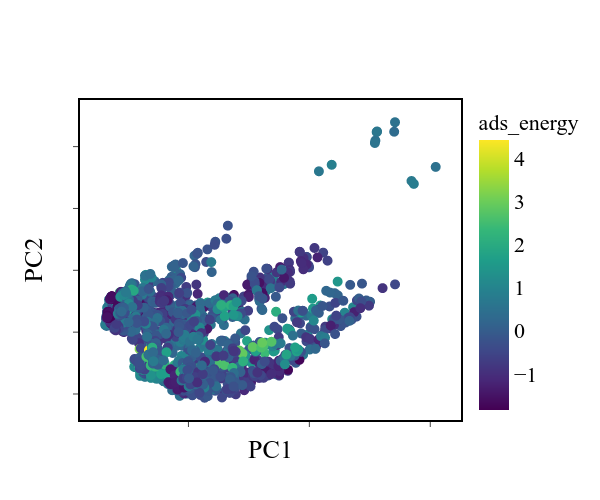

In [36]:
plt_kpca(pre_computed_kernel, ads_energies, filenames)